# Corpus overview

## load pckg

In [1]:
library(tidyverse)
library(tidytext)

library(MetBrewer)
theme_set(theme_minimal())

library(extrafont)
library(showtext)
font_add("Arial", "/Library/Fonts/Arial.ttf") 
showtext_auto()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registering fonts with R

Ładowanie wymaganego pakietu: sysfonts

Ładowanie wymaganego pakietu: showtextdb


Dołączanie pakietu: ‘showtextdb’


Następujący obiekt został zakryty z ‘package:extrafont’:

    font_install




## load data

In [2]:
load("../../data/corpus1835/corpus_1835.Rda")
glimpse(corpus_1835)

Rows: 4,149
Columns: 19
$ text_id        <chr> "C_101__1", "C_101__2", "C_101__3", "C_101__4", "C_101_…
$ corpus         <chr> "cols", "cols", "cols", "cols", "cols", "cols", "cols",…
$ subcorpus      <chr> "col_lyr", "col_lyr", "col_lyr", "col_lyr", "col_lyr", …
$ A_ID           <chr> "A_22", "A_22", "A_22", "A_22", "A_22", "A_22", "A_22",…
$ author         <chr> "Кашкин Д.Е.", "Кашкин Д.Е.", "Кашкин Д.Е.", "Кашкин Д.…
$ author_sign    <chr> "Кашкин Д.Е.", "Кашкин Д.Е.", "Кашкин Д.Е.", "Кашкин Д.…
$ text_title     <chr> "Романс", "Романс", "Романс", "Романс", "Романс", "Рома…
$ first_line     <chr> "В власти - ль смертного забыть,", "Время протекло прия…
$ subtitle       <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ source         <chr> "Кашкин Д.Е. Сочинения Дмитрия Кашкина: В 3 т. Т. 1. М.…
$ year           <dbl> 1836, 1836, 1836, 1836, 1836, 1836, 1836, 1836, 1836, 1…
$ text_raw       <chr> "В власти - ль смертного забыть,\nЧто ему всего дороже?…
$ text_lemm     

## total size

In [4]:
print(paste0("Number of poems: ", nrow(corpus_1835)))

print(paste0("Number of poems in periodicals: ", table(corpus_1835$corpus)[2]))
print(paste0( "Number of poems in collections: ", table(corpus_1835$corpus)[1]))

print(paste0("Number of lines: ",
corpus_1835 %>% 
  select(corpus, text_raw) %>% 
  separate_rows(text_raw, sep = "\n") %>% 
  filter(text_raw != "") %>% nrow() ))

corpus_1835 %>% 
  select(corpus, text_raw) %>% 
  separate_rows(text_raw, sep = "\n") %>% 
  filter(text_raw != "") %>% 
  count(corpus)

print("Number of tokens:")
corpus_1835 %>% 
  select(corpus, text_lemm) %>% 
  unnest_tokens(input = text_lemm, output = word, token = "words") %>% 
  nrow()

corpus_1835 %>% 
  select(corpus, text_lemm) %>% 
  unnest_tokens(input = text_lemm, output = word, token = "words") %>% 
  count(corpus) 

  
print("Number of lemmas:")
corpus_1835 %>% 
  select(corpus, text_lemm) %>% 
  unnest_tokens(input = text_lemm, output = word, token = "words") %>% 
  count(word) %>% nrow

corpus_1835 %>% 
  select(corpus, text_lemm) %>% 
  unnest_tokens(input = text_lemm, output = word, token = "words") %>% 
  count(corpus, word) %>%
  select(-n) %>%
  ungroup() %>%
  count(corpus)

[1] "Number of poems: 4149"
[1] "Number of poems in periodicals: 1814"
[1] "Number of poems in collections: 2335"
[1] "Number of lines: 163026"


corpus,n
<chr>,<int>
cols,95025
per,68001


[1] "Number of tokens:"


[1] 740628

corpus,n
<chr>,<int>
cols,427042
per,313586


[1] "Number of lemmas:"


[1] 28348

corpus,n
<chr>,<int>
cols,22390
per,18154


## size - poems

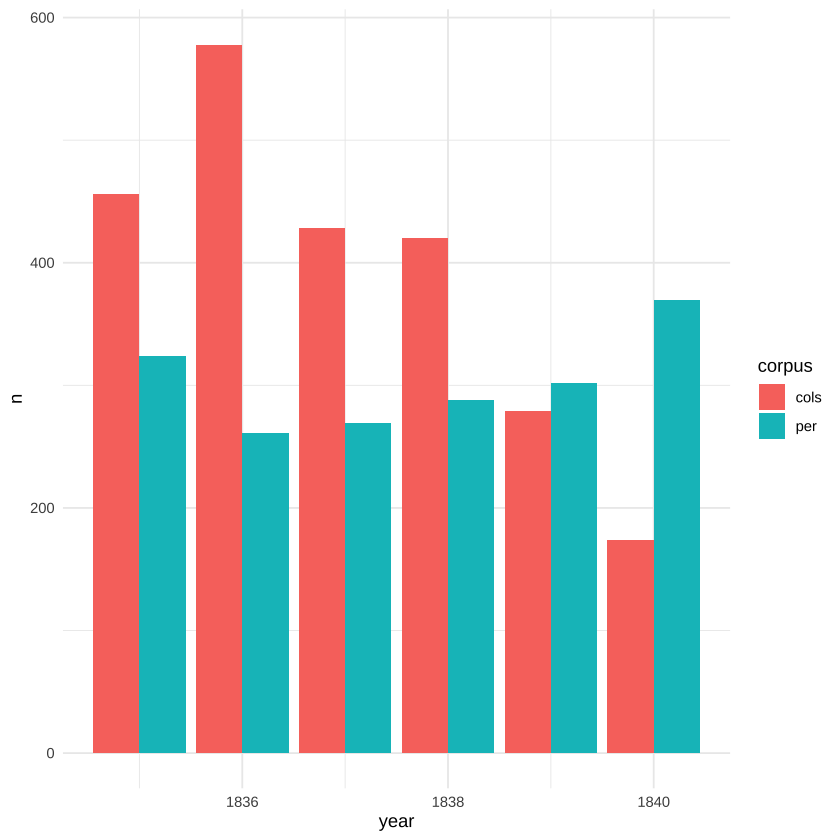

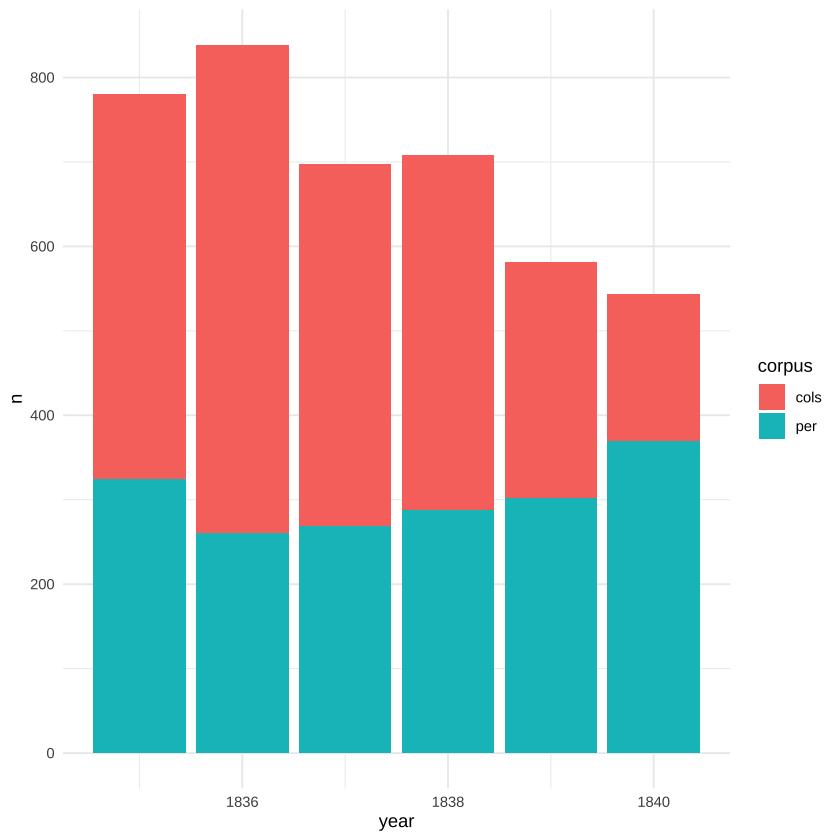

In [5]:
corpus_1835 %>% 
  count(year, corpus) %>% 
  ggplot(aes(x = year, y = n, fill = corpus)) + geom_col(position = "dodge")

corpus_1835 %>% 
  count(year, corpus) %>% 
  ggplot(aes(x = year, y = n, fill = corpus)) + geom_col(position = "stack")

## size - tokens

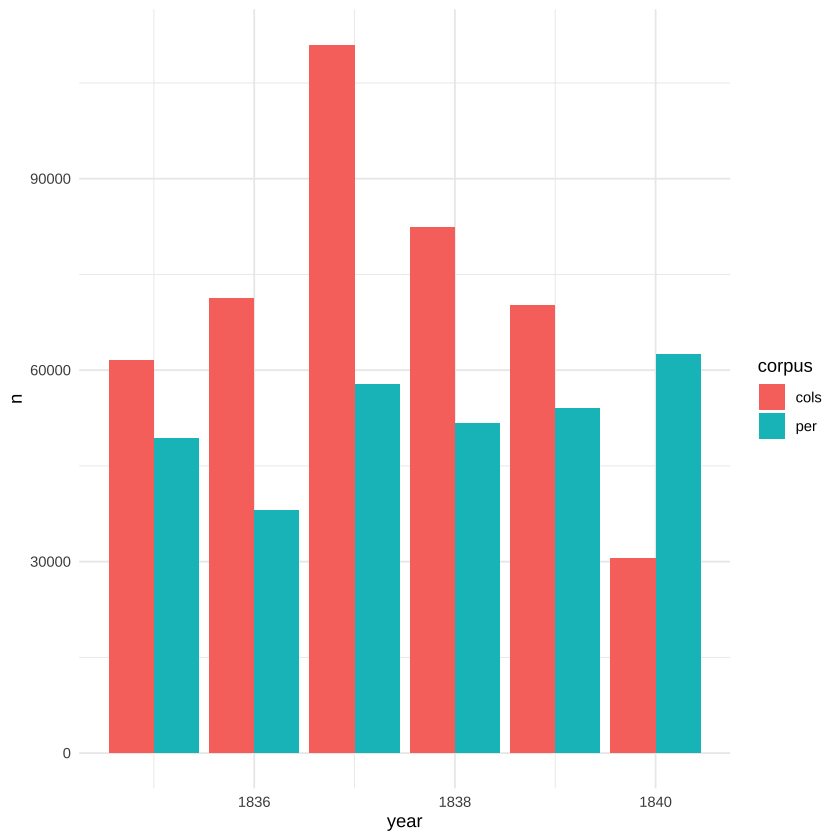

[1] 740628

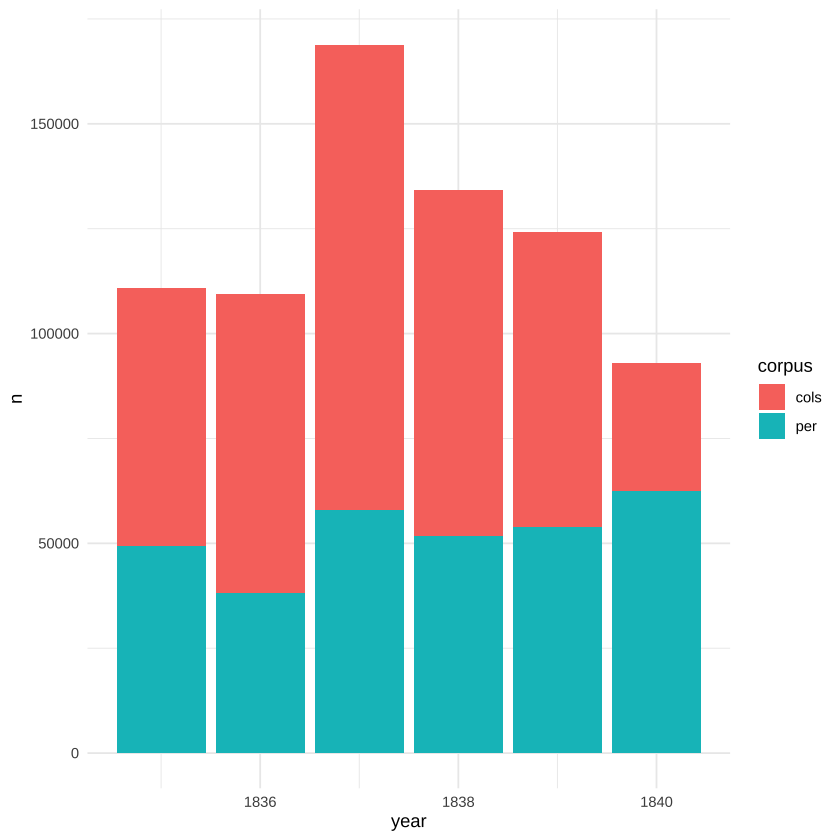

In [6]:
tokens <- corpus_1835 %>% 
  select(corpus, year, text_lemm) %>% 
  unnest_tokens(input = text_lemm, output = word, token = "words") %>% 
  count(corpus, year)
  
tokens %>%  
  ggplot(aes(x = year, y = n, fill = corpus)) + geom_col(position = "dodge")

tokens %>% 
  ggplot(aes(x = year, y = n, fill = corpus)) + geom_col(position = "stack")

sum(tokens$n)

## size - authors' corpus

Poems

,author,corpus,n
,<chr>,<chr>,<int>
1,Суханов М.Д.,cols,132
2,Баратынский Е.А.,cols,131
3,Мейснер А.Я.,cols,106
4,Быстроглазов А.,cols,97
5,Меркли М.М.,cols,93
6,Демидов М.А.,cols,75
7,Башкатов А.,cols,69
8,Тимофеев А.В.,cols,68
9,Ушаков А.А.,cols,65


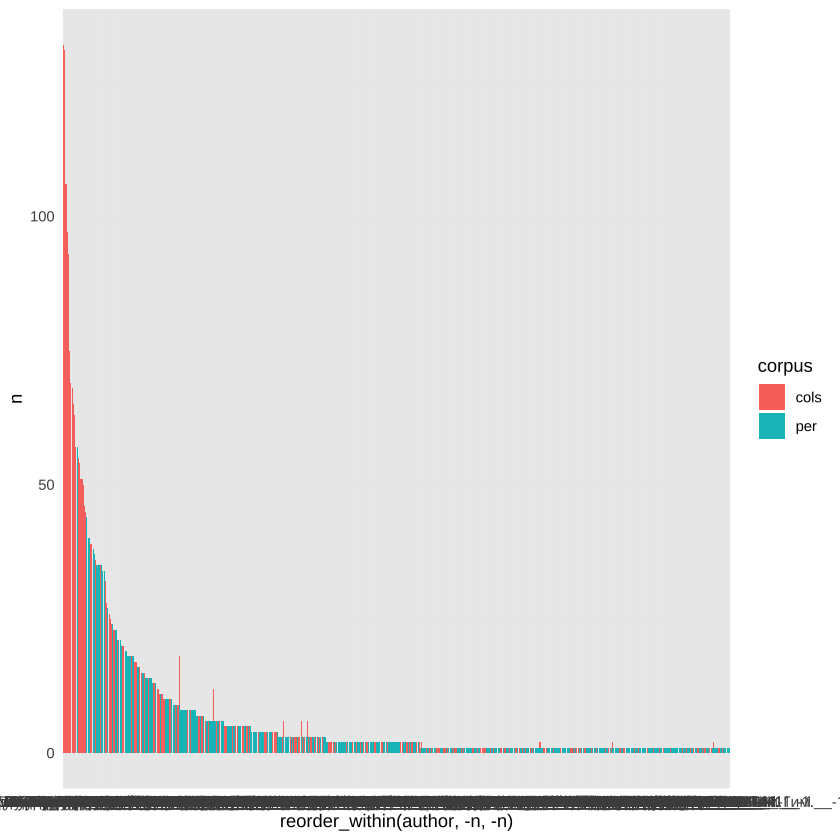

In [7]:
corpus_1835 %>%
  mutate(author = ifelse(author == "", author_sign, author)) %>% 
  filter(author != "") %>% 
  count(author, corpus, sort = T) %>% 
  head(30)

corpus_1835 %>%
  mutate(author = ifelse(author == "", author_sign, author)) %>% 
  filter(author != "") %>% 
  count(author, corpus, sort = T) %>% 
  ggplot(aes(x = reorder_within(author, -n, -n), y = n, fill = corpus)) + geom_col()

,author,n
,<chr>,<int>
1,Кульман Е.Б.,25338
2,Бернет Е.,22293
3,Быстроглазов А.,19582
4,Тимофеев А.В.,19520
5,Смирнова А.,19216
6,Баратынский Е.А.,17968
7,Мартынов А.,16607
8,Башкатов А.,16484
9,Мейснер А.Я.,15871


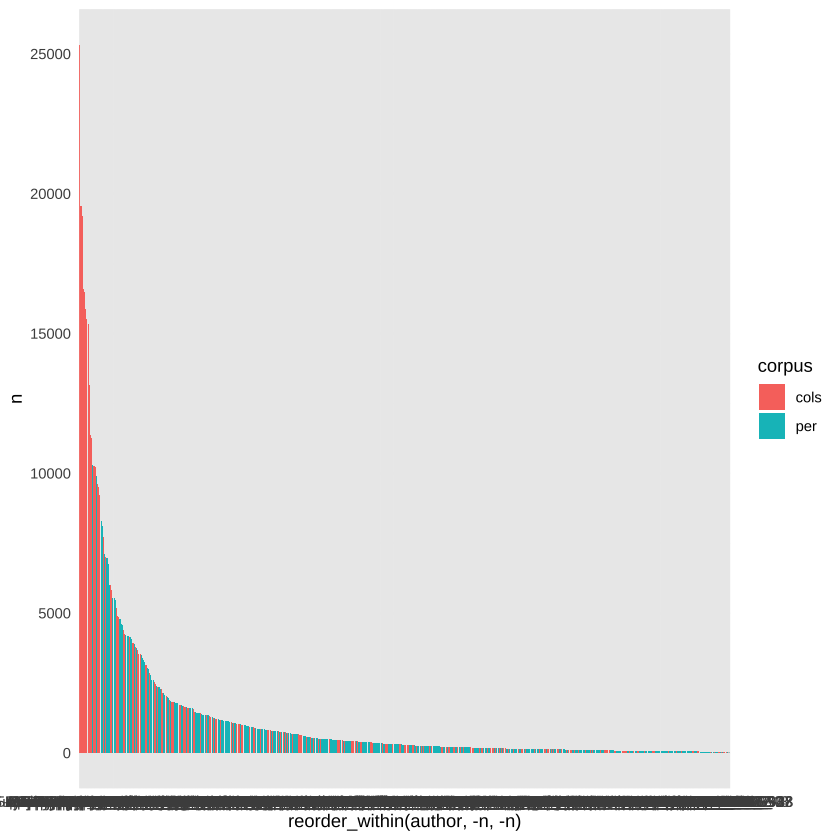

In [8]:
corpus_1835 %>%
  mutate(author = ifelse(author == "", author_sign, author)) %>% 
  filter(author != "") %>% 
  select(author, corpus, text_lemm) %>% 
  unnest_tokens(input = text_lemm, output = word, token = "words") %>%
  count(author, sort = T) %>% 
  head(30)

corpus_1835 %>%
  mutate(author = ifelse(author == "", author_sign, author)) %>% 
  filter(author != "") %>% 
  select(author, corpus, text_lemm) %>% 
  unnest_tokens(input = text_lemm, output = word, token = "words") %>%
  count(author, corpus, sort = T) %>% 
  ggplot(aes(x = reorder_within(author, -n, -n), y = n, fill = corpus)) + geom_col()

## Genre labels

In [18]:
corpus_1835 %>% 
    select(year, text_title)  %>% 
    unnest_tokens(input = text_title, output = word, token = "words") %>% 
    count(word, sort = T)  %>% 
    filter(nchar(word) > 2)  %>% 
    head(40)

corpus_1835 %>% 
    select(year, subtitle)  %>% 
    unnest_tokens(input = subtitle, output = word, token = "words") %>% 
    count(word, sort = T)  %>% 
    filter(nchar(word) > 2)  %>% 
    head(30)

,word,n
,<chr>,<int>
1,песня,118
2,романс,62
3,шарада,51
4,песнь,48
5,ночь,39
6,элегия,39
7,русская,35
8,смерть,35
9,поэт,33


,word,n
,<chr>,<int>
1,песни,87
2,басня,54
3,стихотворения,39
4,баллада,31
5,три,25
6,подражание,23
7,гюго,21
8,сонет,20
9,гете,18


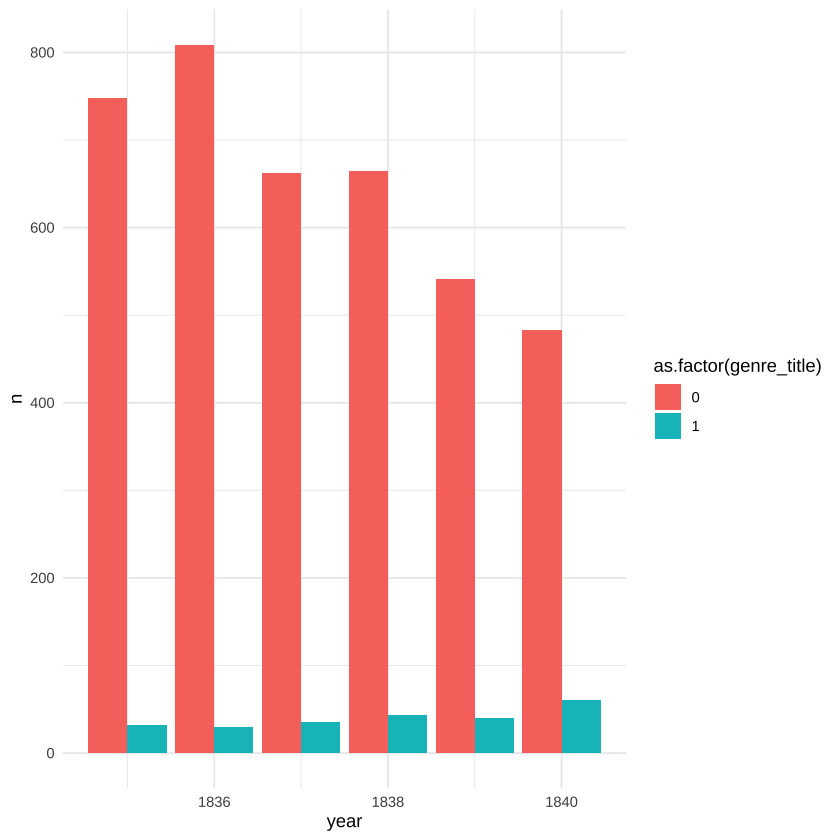

In [32]:
genre_words <- paste(c("песня", "романс", "шарада", "песнь", "элегия", "омоним",
                "альбом", "послание", "псалом", "сонет", "дума", "песни",
                "басня", "баллада", "подражание", "отрывок", "сонета", 
                "эпиграммы", "басни"), collapse = "|")

gt <- corpus_1835 %>% 
    #filter(corpus == "per") %>% 
    select(text_id, year, text_title, subtitle)  %>% 
    filter(str_detect(text_title, genre_words)|str_detect(subtitle, genre_words)) %>% 
    mutate(genre_title = 1)

corpus_1835 %>% 
    #filter(corpus == "per") %>% 
    left_join(gt %>% select(text_id, genre_title), by = "text_id")  %>% 
    count(year, genre_title)  %>% 
    mutate(genre_title = ifelse(is.na(genre_title), 0, 1)) %>% 
    ggplot(aes(x = year, y = n, fill = as.factor(genre_title))) + geom_col(position = "dodge")

## basic metrics

In [33]:
glimpse(corpus_1835)

Rows: 4,149
Columns: 19
$ text_id        <chr> "C_101__1", "C_101__2", "C_101__3", "C_101__4", "C_101_…
$ corpus         <chr> "cols", "cols", "cols", "cols", "cols", "cols", "cols",…
$ subcorpus      <chr> "col_lyr", "col_lyr", "col_lyr", "col_lyr", "col_lyr", …
$ A_ID           <chr> "A_22", "A_22", "A_22", "A_22", "A_22", "A_22", "A_22",…
$ author         <chr> "Кашкин Д.Е.", "Кашкин Д.Е.", "Кашкин Д.Е.", "Кашкин Д.…
$ author_sign    <chr> "Кашкин Д.Е.", "Кашкин Д.Е.", "Кашкин Д.Е.", "Кашкин Д.…
$ text_title     <chr> "Романс", "Романс", "Романс", "Романс", "Романс", "Рома…
$ first_line     <chr> "В власти - ль смертного забыть,", "Время протекло прия…
$ subtitle       <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ source         <chr> "Кашкин Д.Е. Сочинения Дмитрия Кашкина: В 3 т. Т. 1. М.…
$ year           <dbl> 1836, 1836, 1836, 1836, 1836, 1836, 1836, 1836, 1836, 1…
$ text_raw       <chr> "В власти - ль смертного забыть,\nЧто ему всего дороже?…
$ text_lemm     

In [40]:
corpus_1835 %>% 
    count(meter)  %>% 
    mutate(total = nrow(corpus_1835),
          perc = round((n/total)*100, 1)
          )  %>% 
    arrange(desc(perc))  

meter,n,total,perc
<fct>,<int>,<int>,<dbl>
Iamb,2618,4149,63.1
Trochee,770,4149,18.6
Amphibrach,370,4149,8.9
Other?,185,4149,4.5
Anapest,129,4149,3.1
Dactyl,77,4149,1.9


In [38]:
table(corpus_1835$corpus)
table(corpus_1835$corpus)[[1]]
table(corpus_1835$corpus)[[2]]

corpus_1835 %>% 
    count(corpus, meter)  %>% 
    mutate(total = ifelse(corpus == "cols", 
                          table(corpus_1835$corpus)[[1]], 
                          table(corpus_1835$corpus)[[2]]),
          perc = round((n/total)*100, 1)
          )  %>% 
    arrange(desc(perc))  %>% 
    arrange(desc(corpus))


cols  per 
2335 1814 

[1] 2335

[1] 1814

corpus,meter,n,total,perc
<chr>,<fct>,<int>,<int>,<dbl>
per,Iamb,1074,1814,59.2
per,Trochee,363,1814,20.0
per,Amphibrach,184,1814,10.1
per,Other?,100,1814,5.5
per,Anapest,62,1814,3.4
per,Dactyl,31,1814,1.7
cols,Iamb,1544,2335,66.1
cols,Trochee,407,2335,17.4
cols,Amphibrach,186,2335,8.0


#### formulas

In [52]:
corpus_1835  %>% 
    count(formula)  %>% 
    mutate(total = nrow(corpus_1835),
          perc = round((n/total)*100, 1)
          )  %>% 
    arrange(desc(perc)) #%>% head(10)

formula,n,total,perc
<chr>,<int>,<int>,<dbl>
Iamb_4,1374,4149,33.1
Iamb_other,648,4149,15.6
Trochee_4,580,4149,14.0
Iamb_6,342,4149,8.2
Iamb_5,200,4149,4.8
Other?_?,185,4149,4.5
Amphibrach_4,170,4149,4.1
Amphibrach_other,129,4149,3.1
Trochee_other,110,4149,2.7


In [56]:
corpus_1835 %>% 
    count(corpus, formula)  %>% 
    mutate(total = ifelse(corpus == "cols", 
                          table(corpus_1835$corpus)[[1]], 
                          table(corpus_1835$corpus)[[2]]),
          perc = round((n/total)*100, 1)
          )  %>% 
    arrange(desc(perc))  %>% 
    arrange(desc(corpus))  %>% 
    group_by(corpus)  %>% 
    slice_max(n = 15, order_by = perc)

corpus,formula,n,total,perc
<chr>,<chr>,<int>,<int>,<dbl>
cols,Iamb_4,851,2335,36.4
cols,Iamb_other,351,2335,15.0
cols,Trochee_4,311,2335,13.3
cols,Iamb_6,196,2335,8.4
cols,Iamb_5,98,2335,4.2
cols,Other?_?,85,2335,3.6
cols,Amphibrach_4,82,2335,3.5
cols,Iamb_3,62,2335,2.7
cols,Amphibrach_other,60,2335,2.6


### rnc

In [43]:
load("../../data/nkrja_19th_lem.Rda")
glimpse(c19)

Rows: 15,569
Columns: 41
$ Unnamed..0          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ path                <chr> "xix/1790-1810_poets/poets-001", "xix/1790-1810_po…
$ author              <chr> "С. С. Бобров", "С. С. Бобров", "С. С. Бобров", "С…
$ dub                 <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ original            <chr> "", "", "Гораций", "", "", "", "", "", "", "", "",…
$ language            <chr> "", "", "латинский", "", "", "", "", "", "", "", "…
$ header              <chr> "Царство всеобщей любви : «Еще вкруг солнцев не вр…
$ cyclus              <chr> "", "", "", "", "", "", "", "", "", "", "", "", ""…
$ liber               <chr> "", "", "", "", "", "", "", "", "", "", "", "", ""…
$ created             <chr> "1785", "1785", "1787", "1789", "1789", "1789", "1…
$ start               <dbl> 1785, 1785, 1787, 1789, 1789, 1789, 1792, 1800, 18…
$ end                 <dbl> NA, NA, NA, NA, NA, NA, 1800, NA, NA, 1803, 1803, …
$ exact        

In [47]:
rnc1830 <- c19 %>% 
    filter(year > 1830 & year < 1841) 

nrow(rnc1830)

rnc1830 %>% 
    count(meter, sort = T)  %>% 
    mutate(perc = round(n/nrow(rnc1830)*100, 1)) %>% 
    head(10)

[1] 2055

,meter,n,perc
,<chr>,<int>,<dbl>
1,Я,1228,59.8
2,Х,422,20.5
3,Аф,132,6.4
4,Ан,54,2.6
5,Д,41,2.0
6,"Д, тонический : Гек + Пен",23,1.1
7,"Д, тонический : Гек",13,0.6
8,"Ан, Аф",9,0.4
9,Я # Х,8,0.4


In [61]:
rnc1830 %>% 
    mutate(feet = ifelse(str_detect(feet, "вольная"), "free", feet),
           feet = str_remove_all(feet, "\\(\\d+\\)"),
        formula = paste0(meter, "_", feet))  %>% 
    count(formula, sort = T)  %>% 
    mutate(perc = round(n/nrow(rnc1830)*100, 1)) %>% 
    head(30)

,formula,n,perc
,<chr>,<int>,<dbl>
1,Я_4,549,26.7
2,Х_4,340,16.5
3,Я_free,192,9.3
4,Я_5,171,8.3
5,Я_6,152,7.4
6,Аф_4,63,3.1
7,Я_3,29,1.4
8,"Д, тонический : Гек + Пен_6",23,1.1
9,Я_регулярная : 4+3,23,1.1
